In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import chameleon as c
import time

## Analytics vs numerical for the case when $\sigma_a(x, t) = -xt$

In [2]:
def sig_a(env, t):
    """
    Function to specify active stress as a function of time.
    We need to take in the environment so that we can get the
    x postion.
    """
    x = env.pos_init
    return -x * t


def integrate_to_t(env, t):
    """Integrate the environment from 0 to t"""
    time_steps = int(t / env.dt)
    t_arr = np.linspace(0, t, time_steps)
    for t in t_arr:
        sig = sig_a(env, t)
        env.one_step(sig)
    return


def u(env, t):
    """
    Analytic solution of equations of motion given the
    sigma we specified.
    """
    x_term = env.pos_init ** 2 / (2 * env.alpha * env.g ** 2)
    t_term = env.g * t - 1 + np.exp(-env.g * t)
    return x_term * t_term

In [3]:
t = 10
env = c.Chameleon(alpha=5, dt=0.1, init_length=1)
analytic = u(env, t)
integrate_to_t(env, t)

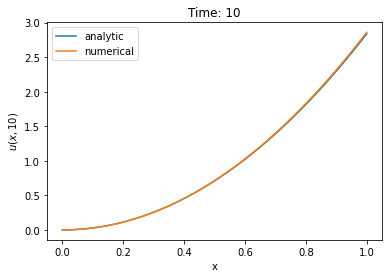

In [4]:
plt.plot(env.pos_init, analytic)
plt.plot(env.pos_init, env.u_current)
plt.xlabel("x")
plt.ylabel(f"$u(x, {t})$")
plt.legend(("analytic", "numerical"))
plt.title(f"Time: {t}")
plt.show()

## Now we consider case 2 where $\sigma_a(x,t) = -sin^2(x)t$ and this gives
\begin{equation}u(x,t) = \frac{x - sin(x)cos(x)}{2\alpha\gamma^2}\left(\gamma t -1 + e^{-\gamma t}\right)\end{equation}

In [5]:
def sig_a(env, t):
    """
    Function to specify active stress as a function of time.
    We need to take in the environment so that we can get the
    x postion.
    """
    x = env.pos_init
    active_stress = -t * np.sin(x) ** 2
    return active_stress


def integrate_to_t(env, t):
    """Integrate the environment from 0 to t"""
    time_steps = int(t / env.dt)
    t_arr = np.linspace(0, t, time_steps)
    for t in t_arr:
        sig = sig_a(env, t)
        env.one_step(sig)
    return


def u(env, t):
    """
    Analytic solution of equations of motion given the
    sigma we specified.
    """
    x = env.pos_init
    x_term = (x - np.sin(x) * np.cos(x)) / (2 * env.alpha * env.g ** 2)
    t_term = env.g * t - 1 + np.exp(-env.g * t)
    return x_term * t_term

In [6]:
t = 10
env = c.Chameleon(alpha=100, dt=0.01, init_length=10)
analytic = u(env, t)
integrate_to_t(env, t)

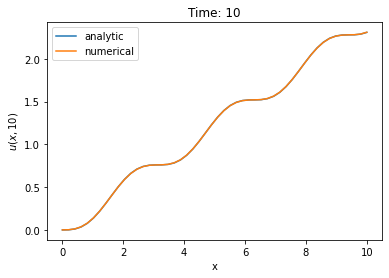

In [7]:
plt.plot(env.pos_init, analytic)
plt.plot(env.pos_init, env.u_current)
plt.xlabel("x")
plt.ylabel(f"$u(x, {t})$")
plt.legend(("analytic", "numerical"))
plt.title(f"Time: {t}")
plt.show()

## Now we use $\sigma_a(x, t) = -sin^2(x)sin^2(t) - 1$ and this gives
\begin{equation}
u(x, t) = \frac{x - sinxcosx}{4\alpha\gamma(\gamma^2+4)} (-\gamma^2cos(2t) + \gamma^2 - 2\gamma sin(2t) ) + \frac{x}{\alpha \gamma} (1- e^{-\gamma t})
\end{equation}

In [8]:
def sig_a(env, t):
    """
    Function to specify active stress as a function of time.
    We need to take in the environment so that we can get the
    x postion.
    """
    x = env.pos_init
    active_stress = -(np.sin(x) ** 2) * np.sin(t) ** 2 - 1
    return active_stress


def integrate_to_t(env, t):
    """Integrate the environment from 0 to t"""
    time_steps = int(t / env.dt)
    t_arr = np.linspace(0, t, time_steps)
    for t in t_arr:
        sig = sig_a(env, t)
        env.one_step(sig)
    return


def u(env, t):
    """
    Analytic solution of equations of motion given the
    sigma we specified.
    """
    x = env.pos_init
    x_term1 = (x - np.sin(x) * np.cos(x)) / (4 * env.alpha * env.g * (env.g ** 2 + 4))
    x_term2 = x / (env.alpha * env.g)
    t_term1 = (
        (-env.g ** 2) * np.cos(2 * t)
        + env.g ** 2
        - 2 * env.g * np.sin(2 * t)
        + 4
        - 4 * np.exp(-env.g * t)
    )
    t_term2 = 1 - np.exp(-env.g * t)
    return x_term1 * t_term1 + x_term2 * t_term2

In [9]:
t = 10
env = c.Chameleon(alpha=10, E=20, dt=0.001, init_length=3)
analytic = u(env, t)
integrate_to_t(env, t)

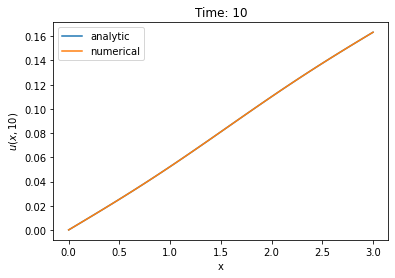

In [10]:
plt.plot(env.pos_init, analytic)
plt.plot(env.pos_init, env.u_current)
plt.xlabel("x")
plt.ylabel(f"$u(x, {t})$")
plt.legend(("analytic", "numerical"))
plt.title(f"Time: {t}")
plt.show()